In [28]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import nltk
stop=nltk.corpus.stopwords.words('english')
from nltk import word_tokenize
import stanza
nlp = stanza.Pipeline(lang='ko', processors='tokenize,pos,lemma')
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from wordcloud import WordCloud

2023-01-27 15:18:19 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2023-01-27 15:18:19 INFO: Loading these models for language: ko (Korean):
| Processor | Package |
-----------------------
| tokenize  | kaist   |
| pos       | kaist   |
| lemma     | kaist   |

2023-01-27 15:18:19 INFO: Use device: cpu
2023-01-27 15:18:19 INFO: Loading: tokenize
2023-01-27 15:18:19 INFO: Loading: pos
2023-01-27 15:18:19 INFO: Loading: lemma
2023-01-27 15:18:20 INFO: Done loading processors!


In [2]:
data=pd.read_csv('/Volumes/T7/mt-hemingway/data/book_final.csv')
cosine_df=pd.read_csv('/Volumes/T7/mt-hemingway/data/cosine_df.csv')
korean_df=pd.read_csv('/Volumes/T7/mt-hemingway/data/korean_df.csv')

In [20]:
data.columns

Index(['original', 'small', 'big', 'OPUS_small', 'OPUS_big', 'kakao_org',
       'M2M100_org', 'M2M100_small', 'M2M100_big', 'kakao_small', 'kakao_big',
       'google_org', 'google_small', 'google_big'],
      dtype='object')

In [3]:
korean_df.columns

Index(['small_big', 'small_kakao_org', 'small_M2M100_org', 'small_google_org',
       'big_kakao_org', 'big_M2M100_org', 'big_google_org',
       'kakao_org_M2M100_org', 'kakao_org_google_org',
       'M2M100_org_google_org'],
      dtype='object')

In [4]:
print(data.shape, cosine_df.shape, korean_df.shape)

(768, 14) (768, 8) (768, 10)


In [5]:
korean_df['small_big'].quantile(0.25)

0.8861515074968338

In [6]:
korean_df['kakao_org_google_org'].quantile(0.25)

0.9099608361721039

In [7]:
def low_quartile(df:pd.DataFrame, small:str, big:str):
    low_quartile_small=df[df[small]<df[small].quantile(0.25)][small].index
    low_quartile_big=df[df[big]<df[big].quantile(0.25)][big].index
    return list(set(low_quartile_small).intersection(set(low_quartile_big)))

In [8]:
def low_quartile_common_small_ratio(low_quartile_list:list, df:pd.DataFrame, small:str):
    low_quartile_small=df[df[small]<df[small].quantile(0.25)][small].index
    return len(low_quartile_list)/len(low_quartile_small)

In [9]:
def low_quartile_common_big_ratio(low_quartile_list:list, df:pd.DataFrame, big:str):
    low_quartile_big=df[df[big]<df[big].quantile(0.25)][big].index
    return len(low_quartile_list)/len(low_quartile_big)

In [11]:
low_quartile_kakao=low_quartile(korean_df, 'small_kakao_org', 'big_kakao_org')
low_quartile_M2M100=low_quartile(korean_df, 'small_M2M100_org', 'big_M2M100_org')
low_quartile_google=low_quartile(korean_df, 'small_google_org', 'big_google_org')

In [13]:
print(low_quartile_common_small_ratio(low_quartile_M2M100, korean_df, 'small_M2M100_org'), low_quartile_common_big_ratio(low_quartile_M2M100, korean_df, 'big_M2M100_org'))
print(low_quartile_common_small_ratio(low_quartile_kakao, korean_df, 'small_kakao_org'), low_quartile_common_big_ratio(low_quartile_kakao, korean_df, 'big_kakao_org'))
print(low_quartile_common_small_ratio(low_quartile_google, korean_df, 'small_google_org'), low_quartile_common_big_ratio(low_quartile_google, korean_df, 'big_google_org'))

0.609375 0.609375
0.578125 0.578125
0.640625 0.640625


In [21]:
def low_quartile_output(df:pd.DataFrame, low_quartile_list:list, translated:str):
    concat1=df.loc[low_quartile_list][translated]
    concat2=df.loc[low_quartile_list]['small']
    concat3=df.loc[low_quartile_list]['big']
    quartile_df=pd.concat([concat1, concat2, concat3], axis=1, ignore_index=True)
    quartile_df.columns=[translated, 'small', 'big']
    return quartile_df

In [22]:
# quartile_OPUS=low_quartile_output(data, low_quartile_OPUS, 'OPUS_small', 'OPUS_big')
quartile_M2M100=low_quartile_output(data, low_quartile_M2M100, 'M2M100_org')
quartile_kakao=low_quartile_output(data, low_quartile_kakao, 'kakao_org')
quartile_google=low_quartile_output(data, low_quartile_google, 'google_org')

In [23]:
quartile_M2M100

,M2M100_org,small,big
4,늙은이는 얇고 그의 목 뒤쪽에 깊은 싹이 쌓여있었습니다.,산티아고는 깡마른 몸에 목덜미에는 깊은 주름살이 패어 있었다.,노인은 깡마르고 여윈 데다 목덜미에는 주름이 깊게 잡혀 있었다.
10,"아니요, 늙은이가 말했습니다. ""당신은 운이 좋은 보트를 가지고 있습니다.",“그건 안 돼.” 노인이 말했다. “너는 마침 재수 좋은 배를 타고 있어. 그러니 ...,"""그건 안 돼. 네가 타는 배는 운이 좋은 배야. 그러니 그 사람들하고 그냥 있어라..."
15,그는 많은 믿음을 가지고 있지 않다.”,“아빠는 신념이 없어요.”,"""그런데 아버지한테는 그다지 신념이라는 게 없어요."""
17,"그 소년은 ""나는 테라스에서 당신에게 맥주를 제공 할 수 있고, 그 다음에 우리는 ...",“그럼요. 그렇고말고요.” 소년이 말했다. “제가 테라스에서 맥주 한잔 사 드릴게요...,“물론이죠. 제가 '테라스'에서 맥주 한 잔 사 드릴 테니 드시고 나서 어구를 나르...
18,늙은이가 말하기를 “낚시꾼들 사이에 있다.”,“좋은 생각이야. 어부끼리 사양은 필요 없으렸다.” 노인이 말했다.,"""그렇게 하자꾸나. 우린 어부들이니까. ""노인이 대답했다."
...,...,...,...
493,당신은 위대한 DiMaggio가 내가이 물고기와 함께 머무를 때까지 물고기와 함께 ...,"‘위대한 디마지오가 만약 나와 같은 상황에 처한다면, 내가 지금 이 녀석과 겨뤄 이...",저 위대한 디마지오 선수는 지금의 나만큼 이렇게 오랫동안 고기하고 맞서 버텨 낼 수...
497,그 후에 모두가 그를 챔피언이라고 불렀고 봄에 반환 경기가 있었다.그러나 많은 돈이...,그 일이 있은 후 오랫동안 사람들은 그를 챔피언이라 불렀다. 봄에는 복수전도 있었다...,"그 뒤 오랫동안 모든 사람이 그를 '챔피언' 이라고 불렀고, 봄에는 복수전이 있었다..."
508,"나는 그것을 할 수있는 방법을 배우고있다, 그는 생각했다.이 부분은 어쨌든.그리고 ...",노인은 생각했다. ‘이제 요령이 생기는구나. 이런 방법이면 나에게 유리하게 진행되어...,"이제 조금씩 요령이 생기기시작하는군, 하고 노인은 생각 했다. 어쨌든 이 부분에서는..."
509,"""나는 기분이 좋고 내 왼손은 더 좋고 나는 밤과 하루 동안 음식을 가지고있다.","“이봐, 고기 친구, 지금 기분이 어떤가?” 노인은 큰 목소리로 다시 고기에게 말을...","여보게, 고기 양반, 그래 지금 기분이 어떠신가? 그는 큰 소리로 물었다. ""나는 ..."


In [29]:
def lemmatization(df: pd.DataFrame()):
    df[df.columns[0]]=df[df.columns[0]].str.lower()
    df[df.columns[0]+'_'+'stopwods']=df[df.columns[0]].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    df[df.columns[0]+'_'+'punct']=df[df.columns[0]+'_'+'stopwods'].str.replace('[^\w\s]','')
    df[df.columns[0]+'_'+'lower']=df[df.columns[0]+'_'+'punct'].str.lower()
    df[df.columns[0]+'_'+'lemma']=df[df.columns[0]+'_'+'lower'].apply(lambda x: ([w.lemma for sent in nlp(x).sentences for w in sent.words]))
    # df[df.columns[0]+'_'+'token']=df[df.columns[0]+'_'+'lemma'].apply(word_tokenize)
    df[df.columns[1]]=df[df.columns[1]].str.lower()
    df[df.columns[1]+'_'+'stopwods']=df[df.columns[1]].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    df[df.columns[1]+'_'+'punct']=df[df.columns[1]+'_'+'stopwods'].str.replace('[^\w\s]','')
    df[df.columns[1]+'_'+'lower']=df[df.columns[1]+'_'+'punct'].str.lower()
    df[df.columns[1]+'_'+'lemma']=df[df.columns[1]+'_'+'lower'].apply(lambda x: ([w.lemma for sent in nlp(x).sentences for w in sent.words]))
    # df[df.columns[1]+'_'+'token']=df[df.columns[1]+'_'+'lemma'].apply(word_tokenize)
    df[df.columns[2]]=df[df.columns[2]].str.lower()
    df[df.columns[2]+'_'+'stopwods']=df[df.columns[2]].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    df[df.columns[2]+'_'+'punct']=df[df.columns[2]+'_'+'stopwods'].str.replace('[^\w\s]','')
    df[df.columns[2]+'_'+'lower']=df[df.columns[2]+'_'+'punct'].str.lower()
    df[df.columns[2]+'_'+'lemma']=df[df.columns[2]+'_'+'lower'].apply(lambda x: ([w.lemma for sent in nlp(x).sentences for w in sent.words]))
    # df[df.columns[2]+'_'+'token']=df[df.columns[2]+'_'+'lemma'].apply(word_tokenize)
    return df


In [30]:
# OPUS_lemma=lemmatization(quartile_OPUS)
M2M100_lemma=lemmatization(quartile_M2M100)
kakao_lemma=lemmatization(quartile_kakao)
google_lemma=lemmatization(quartile_google)

In [31]:
M2M100_lemma.head()

,M2M100_org,small,big,M2M100_org_stopwods,M2M100_org_punct,M2M100_org_lower,M2M100_org_lemma,small_stopwods,small_punct,small_lower,small_lemma,big_stopwods,big_punct,big_lower,big_lemma
4,늙은이는 얇고 그의 목 뒤쪽에 깊은 싹이 쌓여있었습니다.,산티아고는 깡마른 몸에 목덜미에는 깊은 주름살이 패어 있었다.,노인은 깡마르고 여윈 데다 목덜미에는 주름이 깊게 잡혀 있었다.,늙은이는 얇고 그의 목 뒤쪽에 깊은 싹이 쌓여있었습니다.,늙은이는 얇고 그의 목 뒤쪽에 깊은 싹이 쌓여있었습니다,늙은이는 얇고 그의 목 뒤쪽에 깊은 싹이 쌓여있었습니다,"[늙은이+는, 얇+고, 그+의, 목, 뒤+쪽+에, 깊+ㄴ, 싹+이, 쌓이+어+있+었...",산티아고는 깡마른 몸에 목덜미에는 깊은 주름살이 패어 있었다.,산티아고는 깡마른 몸에 목덜미에는 깊은 주름살이 패어 있었다,산티아고는 깡마른 몸에 목덜미에는 깊은 주름살이 패어 있었다,"[산티아고+는, 깡마르+ㄴ, 몸+에, 목덜미+에+는, 깊+ㄴ, 주름살+이, 패+어,...",노인은 깡마르고 여윈 데다 목덜미에는 주름이 깊게 잡혀 있었다.,노인은 깡마르고 여윈 데다 목덜미에는 주름이 깊게 잡혀 있었다,노인은 깡마르고 여윈 데다 목덜미에는 주름이 깊게 잡혀 있었다,"[노인+은, 깡마르+고, 여기+ㄴ, 데+다, 목덜미+에+는, 주름+이, 깊+게, 잡..."
10,"아니요, 늙은이가 말했습니다. ""당신은 운이 좋은 보트를 가지고 있습니다.",“그건 안 돼.” 노인이 말했다. “너는 마침 재수 좋은 배를 타고 있어. 그러니 ...,"""그건 안 돼. 네가 타는 배는 운이 좋은 배야. 그러니 그 사람들하고 그냥 있어라...","아니요, 늙은이가 말했습니다. ""당신은 운이 좋은 보트를 가지고 있습니다.",아니요 늙은이가 말했습니다 당신은 운이 좋은 보트를 가지고 있습니다,아니요 늙은이가 말했습니다 당신은 운이 좋은 보트를 가지고 있습니다,"[아니+요, 늙은이+가, 말하+었+습니다, 당신+은, 운+이, 좋+ㄴ, 보트+를, ...",“그건 안 돼.” 노인이 말했다. “너는 마침 재수 좋은 배를 타고 있어. 그러니 ...,그건 안 돼 노인이 말했다 너는 마침 재수 좋은 배를 타고 있어 그러니 계속 그 배...,그건 안 돼 노인이 말했다 너는 마침 재수 좋은 배를 타고 있어 그러니 계속 그 배...,"[그거+ㄴ, 안, 되+어, 노인+이, 말하+었+다, 너+는, 마침, 재수, 좋+ㄴ,...","""그건 안 돼. 네가 타는 배는 운이 좋은 배야. 그러니 그 사람들하고 그냥 있어라...",그건 안 돼 네가 타는 배는 운이 좋은 배야 그러니 그 사람들하고 그냥 있어라 노인...,그건 안 돼 네가 타는 배는 운이 좋은 배야 그러니 그 사람들하고 그냥 있어라 노인...,"[그거+ㄴ, 안, 되+어, 네+가, 타+는, 배+는, 운+이, 좋+ㄴ, 배야, 그러..."
15,그는 많은 믿음을 가지고 있지 않다.”,“아빠는 신념이 없어요.”,"""그런데 아버지한테는 그다지 신념이라는 게 없어요.""",그는 많은 믿음을 가지고 있지 않다.”,그는 많은 믿음을 가지고 있지 않다,그는 많은 믿음을 가지고 있지 않다,"[그+는, 많+ㄴ, 믿음+을, 가지+고, 있+지, 않+다]",“아빠는 신념이 없어요.”,아빠는 신념이 없어요,아빠는 신념이 없어요,"[아빠+는, 신념+이, 없+어+요]","""그런데 아버지한테는 그다지 신념이라는 게 없어요.""",그런데 아버지한테는 그다지 신념이라는 게 없어요,그런데 아버지한테는 그다지 신념이라는 게 없어요,"[그런데, 아버지+한테+는, 그다지, 신념+이+라는, 게, 없+어+요]"
17,"그 소년은 ""나는 테라스에서 당신에게 맥주를 제공 할 수 있고, 그 다음에 우리는 ...",“그럼요. 그렇고말고요.” 소년이 말했다. “제가 테라스에서 맥주 한잔 사 드릴게요...,“물론이죠. 제가 '테라스'에서 맥주 한 잔 사 드릴 테니 드시고 나서 어구를 나르...,"그 소년은 ""나는 테라스에서 당신에게 맥주를 제공 할 수 있고, 그 다음에 우리는 ...",그 소년은 나는 테라스에서 당신에게 맥주를 제공 할 수 있고 그 다음에 우리는 물건...,그 소년은 나는 테라스에서 당신에게 맥주를 제공 할 수 있고 그 다음에 우리는 물건...,"[그, 소년+은, 나+는, 테라스+에서, 당신+에게, 맥주+를, 제공, 하+ㄹ, 수...",“그럼요. 그렇고말고요.” 소년이 말했다. “제가 테라스에서 맥주 한잔 사 드릴게요...,그럼요 그렇고말고요 소년이 말했다 제가 테라스에서 맥주 한잔 사 드릴게요 이 어구들...,그럼요 그렇고말고요 소년이 말했다 제가 테라스에서 맥주 한잔 사 드릴게요 이 어구들...,"[그럼요, 그렇+고+말+고요, 소년+이, 말하+었+다, 제+가, 테라스+에서, 맥주...",“물론이죠. 제가 '테라스'에서 맥주 한 잔 사 드릴 테니 드시고 나서 어구를 나르...,물론이죠 제가 테라스에서 맥주 한 잔 사 드릴 테니 드시고 나서 어구를 나르도록 하...,물론이죠 제가 테라스에서 맥주 한 잔 사 드릴 테니 드시고 나서 어구를 나르도록 하...,"[물론+이+죠, 제+가, 테라스+에서, 맥주, 한, 잔, 사, 드리+ㄹ, 터+이+니..."
18,늙은이가 말하기를 “낚시꾼들 사이에 있다.”,“좋은 생각이야. 어부끼리 사양은 필요 없으렸다.” 노인이 말했다.,"""그렇게 하자꾸나. 우린 어부들이니까. ""노인이 대답했다.",늙은이가 말하기를 “낚시꾼들 사이에 있다.”,늙은이가 말하기를 낚시꾼들 사이에 있다,늙은이가 말하기를 낚시꾼들 사이에 있다,"[늙은이+가, 말하+기+를, 낚시꾼+들, 사이+에, 있+다]",“좋은 생각이야. 어부끼리 사양은 필요 없으렸다.” 노인이 말했다.,좋은 생각이야 어부끼리 사양은 필요 없으렸다 노인이 말했다,좋은 생각이야 어부끼리 사양은 필요 없으렸다 노인이 말했다,"[좋+ㄴ, 생각+이야, 어부끼리, 사양+은, 필요, 없+으렸다, 노인+이, 말하+었+다]","""그렇게 하자꾸나. 우린 어부들이니까. ""노인이 대답했다.",그렇게 하자꾸나 우린 어부들이니까 노인이 대답했다,그렇게 하자꾸나 우린 어부들이니까 노인이 대답했다,"[그렇+게, 하+자꾸나, 우리+는, 어부+들+이+니까, 노인+이, 대답+하+었+다]"


In [32]:
def bias(df: pd.DataFrame(), column1: str, column2: str, column3: str):
    not_in_org_count=[]
    for i in range(df.shape[0]):
        org=[x for x in df[column1].iloc[i] if x is not None]
        compare1=[x for x in df[column2].iloc[i] if x is not None]
        compare2=[x for x in df[column3].iloc[i] if x is not None]
        machine_common=pd.Series(np.intersect1d(compare1, compare2))
        org_common=pd.Series(np.intersect1d(org, machine_common))
        not_in_org=list(set(machine_common)-set(org_common))
        for element in not_in_org:
            not_in_org_count.append(element)
    return not_in_org_count

In [34]:
# OPUS_bias=bias(OPUS_lemma, 'original_lemma', 'OPUS_small_lemma', 'OPUS_big_lemma')
M2M100_bias=bias(M2M100_lemma, 'small_lemma', 'big_lemma', 'M2M100_org_lemma')
kakao_bias=bias(kakao_lemma, 'small_lemma', 'big_lemma', 'kakao_org_lemma')
google_bias=bias(google_lemma, 'small_lemma', 'big_lemma', 'google_org_lemma')

In [64]:
def korean_lemmatization(bias:list):
    lemma_list=[]
    for element in bias:
        lemma_list.append(element.split('+')[0])
    return lemma_list

In [66]:
M2M100_ko_bias=korean_lemmatization(M2M100_bias)
kakao_ko_bias=korean_lemmatization(kakao_bias)
google_ko_bias=korean_lemmatization(google_bias)

In [67]:
Counter(M2M100_ko_bias).most_common(10)

[('그', 16),
 ('있', 5),
 ('것', 5),
 ('크', 4),
 ('생각', 3),
 ('손', 3),
 ('말하', 3),
 ('팔', 3),
 ('동안', 2),
 ('정말로', 2)]

In [68]:
Counter(kakao_ko_bias).most_common(10)

[('그', 12),
 ('있', 8),
 ('말하', 8),
 ('노인', 4),
 ('것', 4),
 ('이제', 3),
 ('보', 3),
 ('손', 3),
 ('너', 2),
 ('한', 2)]

In [69]:
Counter(google_ko_bias).most_common(10)

[('그', 23),
 ('것', 11),
 ('손', 7),
 ('있', 6),
 ('노인', 4),
 ('크', 4),
 ('나', 3),
 ('소리', 3),
 ('죽이', 3),
 ('생각', 3)]

In [74]:
# wc_OPUS=WordCloud(collocations=False, background_color='white').generate(' '.join(OPUS_bias))
wc_M2M100=WordCloud(collocations=False, font_path='/System/Library/Fonts/Supplemental/Arial Unicode.ttf', background_color='white').generate(' '.join(M2M100_ko_bias))
wc_kakao=WordCloud(collocations=False, font_path='/System/Library/Fonts/Supplemental/Arial Unicode.ttf', background_color='white').generate(' '.join(kakao_ko_bias))
wc_google=WordCloud(collocations=False, font_path='/System/Library/Fonts/Supplemental/Arial Unicode.ttf', background_color='white').generate(' '.join(google_ko_bias))

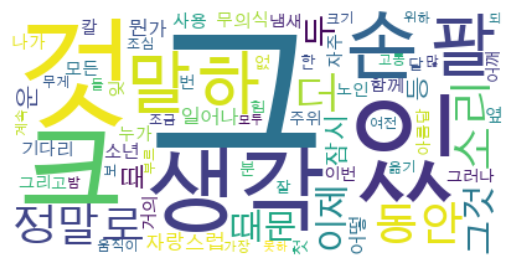

In [75]:
plt.imshow(wc_M2M100, interpolation='bilinear')
plt.axis('off')
plt.show()

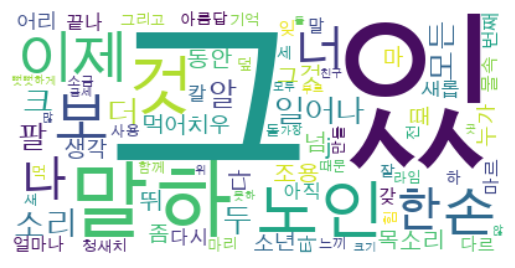

In [76]:
plt.imshow(wc_kakao, interpolation='bilinear')
plt.axis('off')
plt.show()

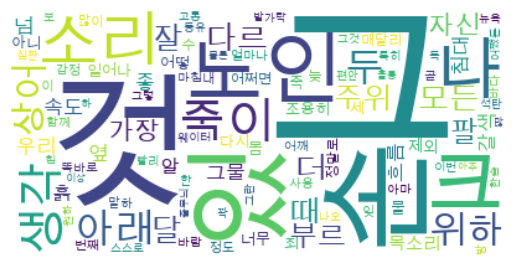

In [77]:
plt.imshow(wc_google, interpolation='bilinear')
plt.axis('off')
plt.show()